# Analysis of Layoff During the Period from 2020 - 2024



<h3>Trends in Global Layoffs Since COVID-19 (Yearly)</h3>
This line chart visually portrays the trajectory of global layoffs from 2020 to the present day, amidst the ongoing COVID-19 pandemic. Each year is represented by a distinct line, allowing us to observe the dynamic shifts in layoff patterns. Circular data points along these lines correspond to specific layoff figures, providing a clear visual representation of the evolving employment landscape.

<h3>Observations:</h3>

<b>2020: The Pandemic Surge</b>
In 2020, the world witnessed a substantial surge in layoffs, totaling 70,621. This sharp increase was a direct consequence of the rapid spread of COVID-19 across the globe. Businesses grappled with lockdowns, reduced demand, and economic uncertainty, leading to widespread workforce reductions.

<b>2021: Navigating Uncertainity</b>
Despite remaining significant at 6,503, layoffs in 2021 exhibited a noticeable slowdown in the rate of increase compared to the previous year. Various regions adapted to the “new normal,” contributing to this moderation in layoffs.

<b>2022: Tech Layoffs Surge</b>
Contrary to the trend observed in 2021, layoffs surged in 2022, reaching 139,380. This escalation highlighted ongoing challenges and economic instability across various sectors as they grappled with the persistent effects of the pandemic.

<b>2023: A Rollercoaster Ride</b>
2023 has witnessed a further increase in layoffs, with figures reaching 181,127. While economies continue their efforts to rebuild, challenges persist. The upward trend in layoffs underscores the lasting impact of the pandemic on the global workforce and the impact of the tech bubble burst.

<h3>Significance:</h3>
This chart provides critical insights into the ever-changing employment landscape during the pandemic. Policymakers and businesses can use it as a valuable reference point while navigating the dynamic effects of COVID-19 on the global workforce and the implications of mass hiring by tech companies.

 # World 2020-2023

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import plotly.express as px 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore")
import os

palette = sns.color_palette("rainbow",8)

In [2]:
df = pd.read_csv("2.csv")

In [3]:
# New column 'year_of_laidoff' tell us which layoff happend
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
    return year_list 

layoff_year_list = get_date()

df['year_of_laidOff']= layoff_year_list

df.drop(['Source','Date_Added','List_of_Employees_Laid_Off'], axis=1, inplace=True)

df=df[df['Laid_Off_Count'].notna()]
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0,2023
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,2023
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,2023


# Did the recent layoffs primarily affect the US and not other countries? 

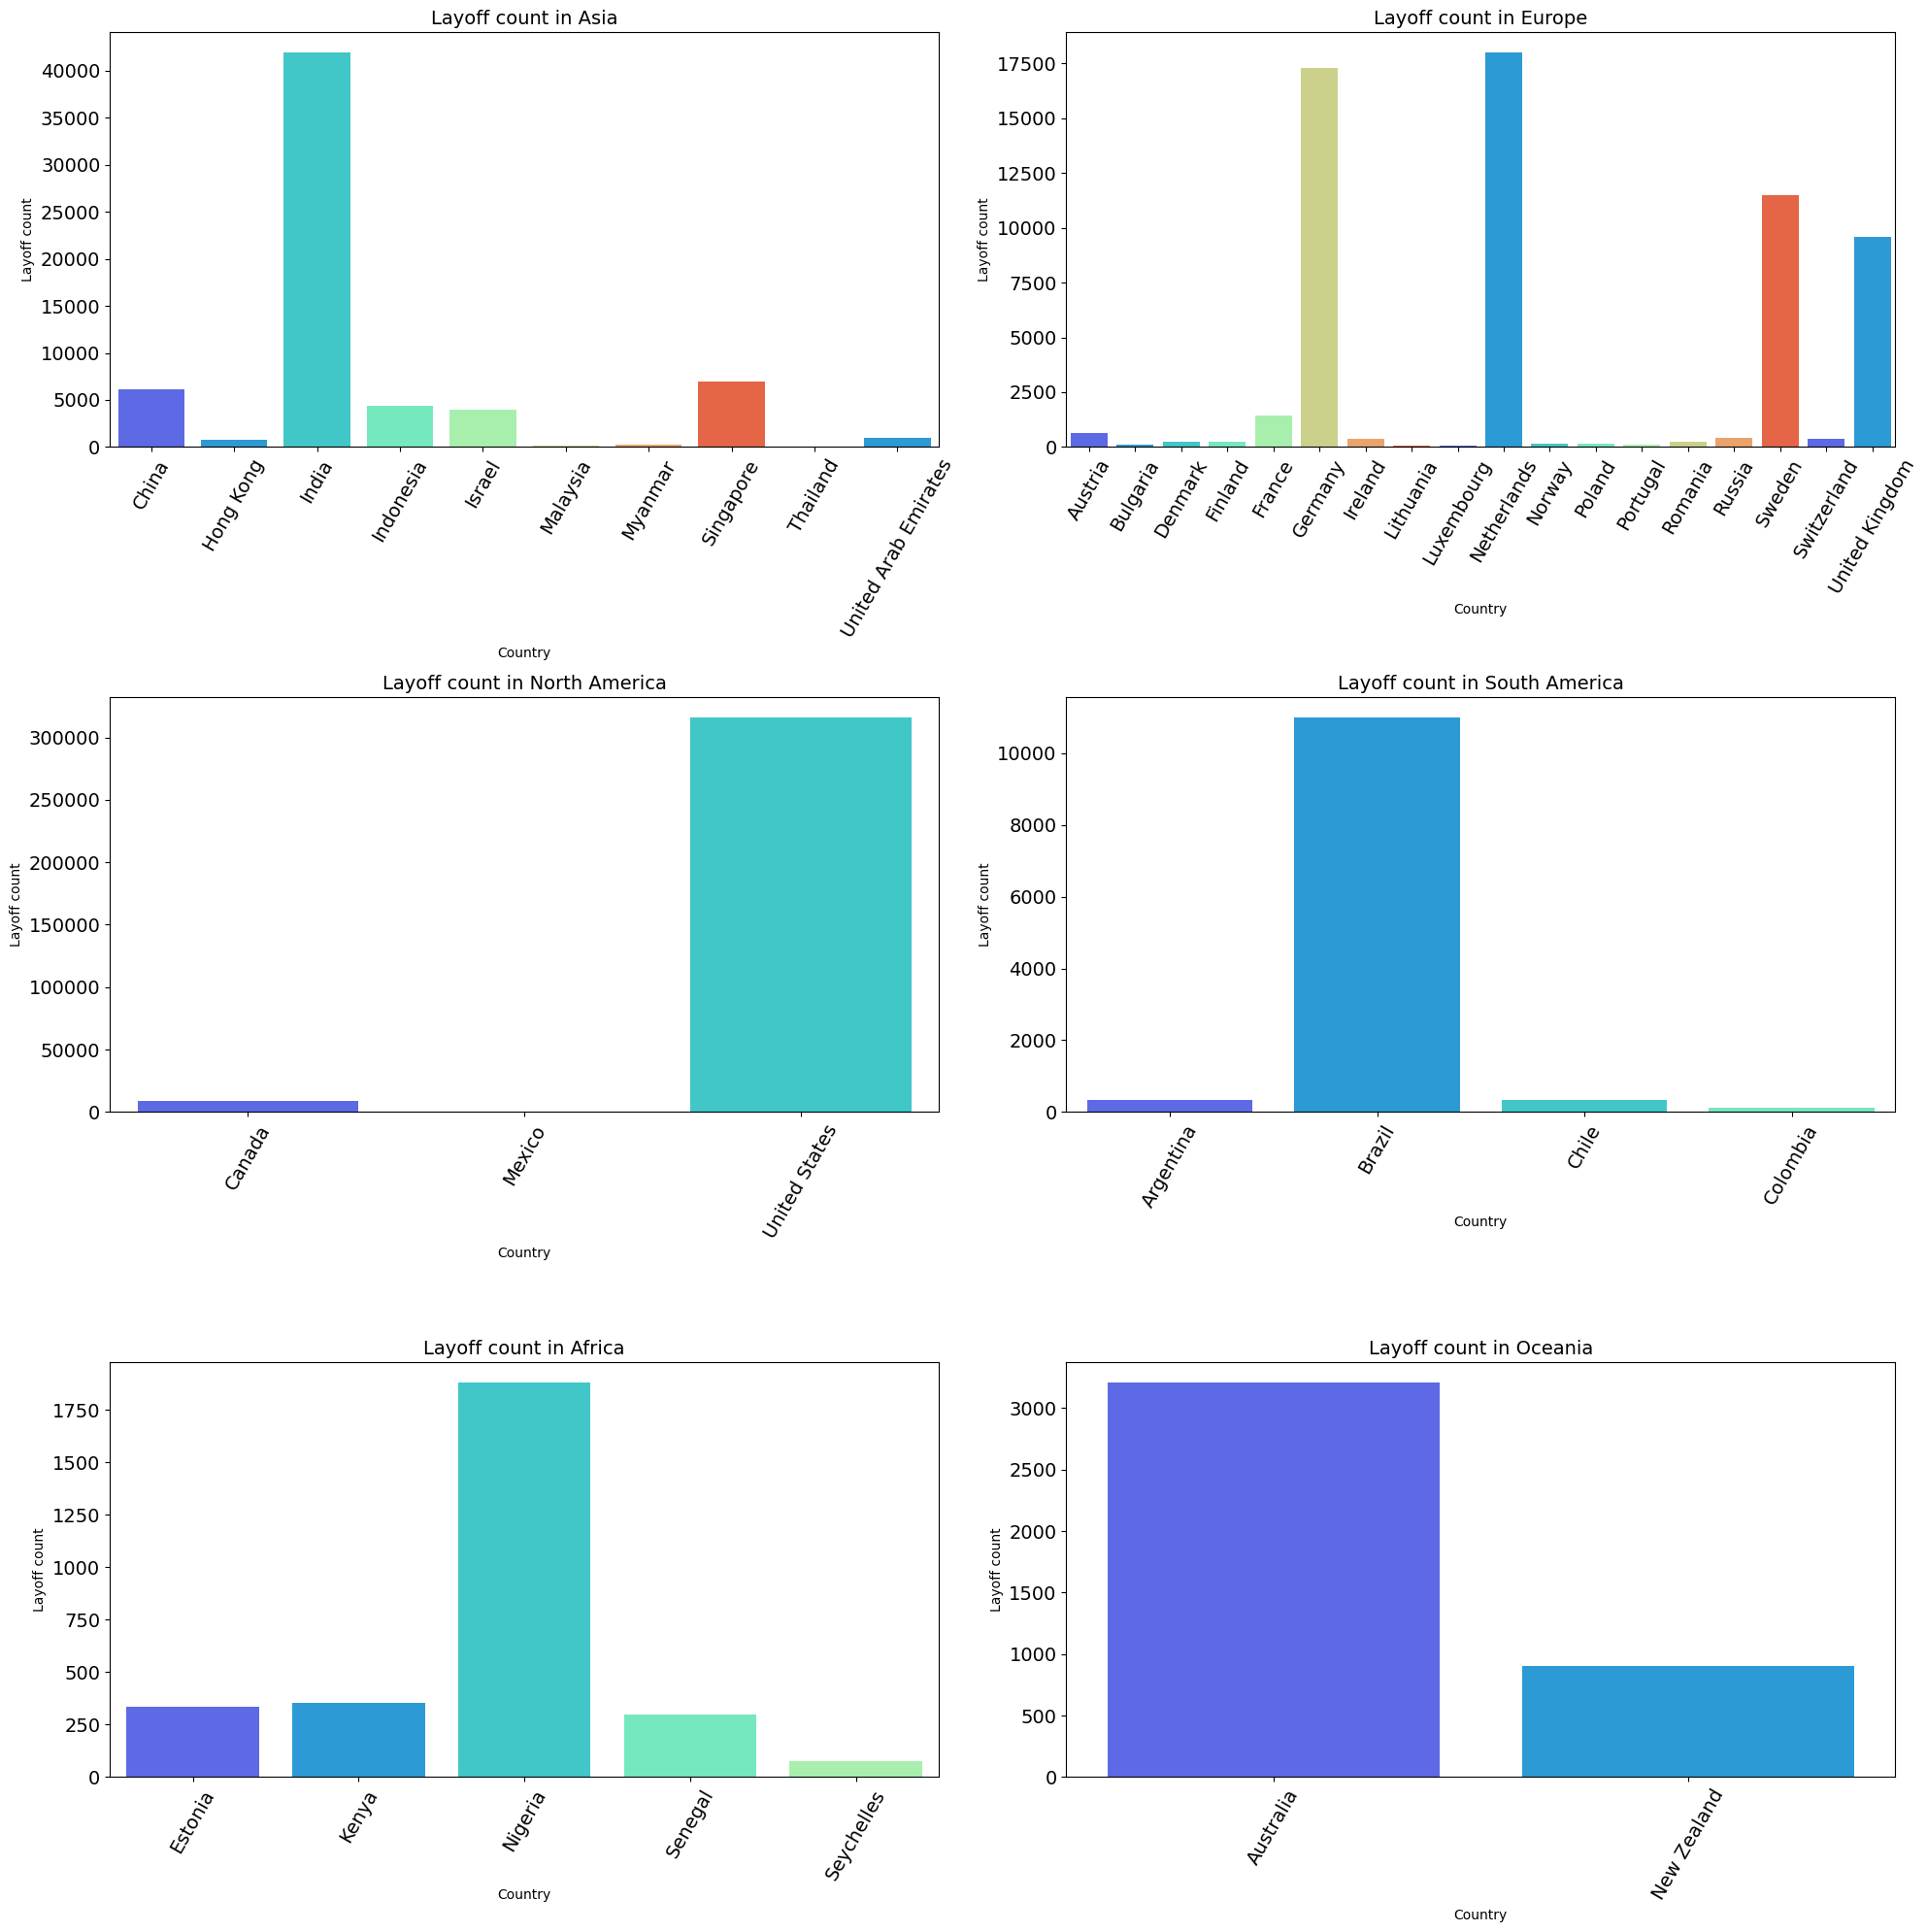

In [4]:
#Analysis

laidOff_countByCountry = df.groupby('Country', as_index =False).sum()
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']



asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]


plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

# USA layoffs compared to other countries.

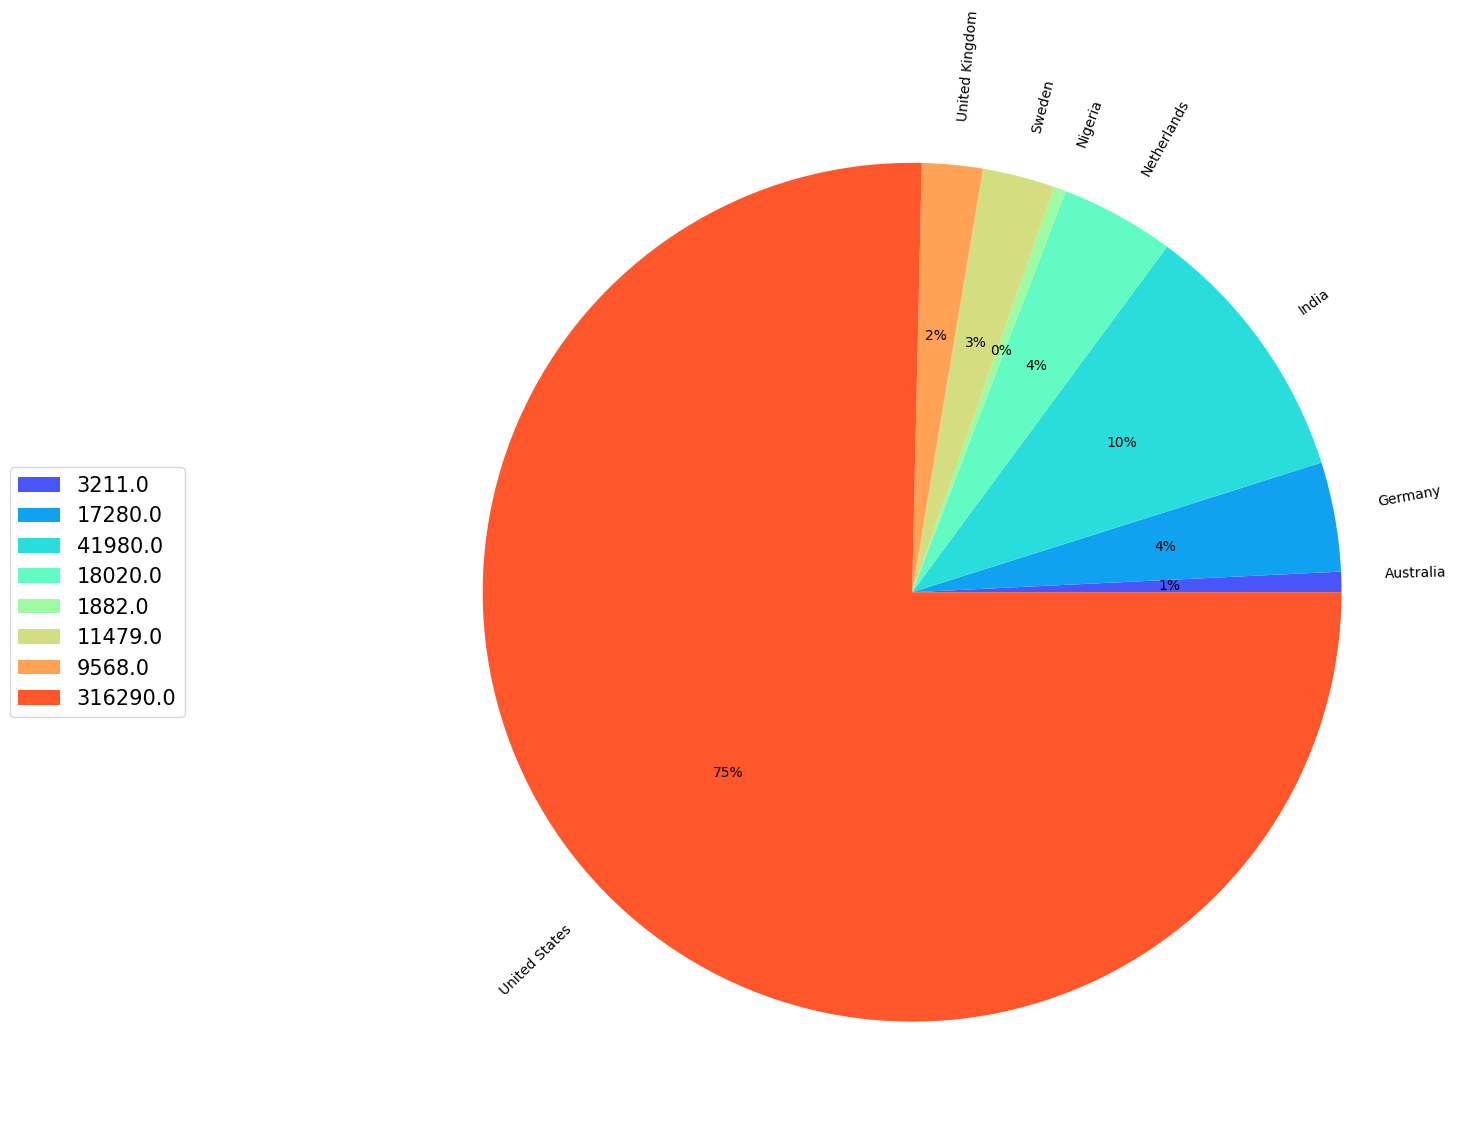

In [5]:
#Deeper Analysis

mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

# Which year witnessed the highest number of layoffs? 

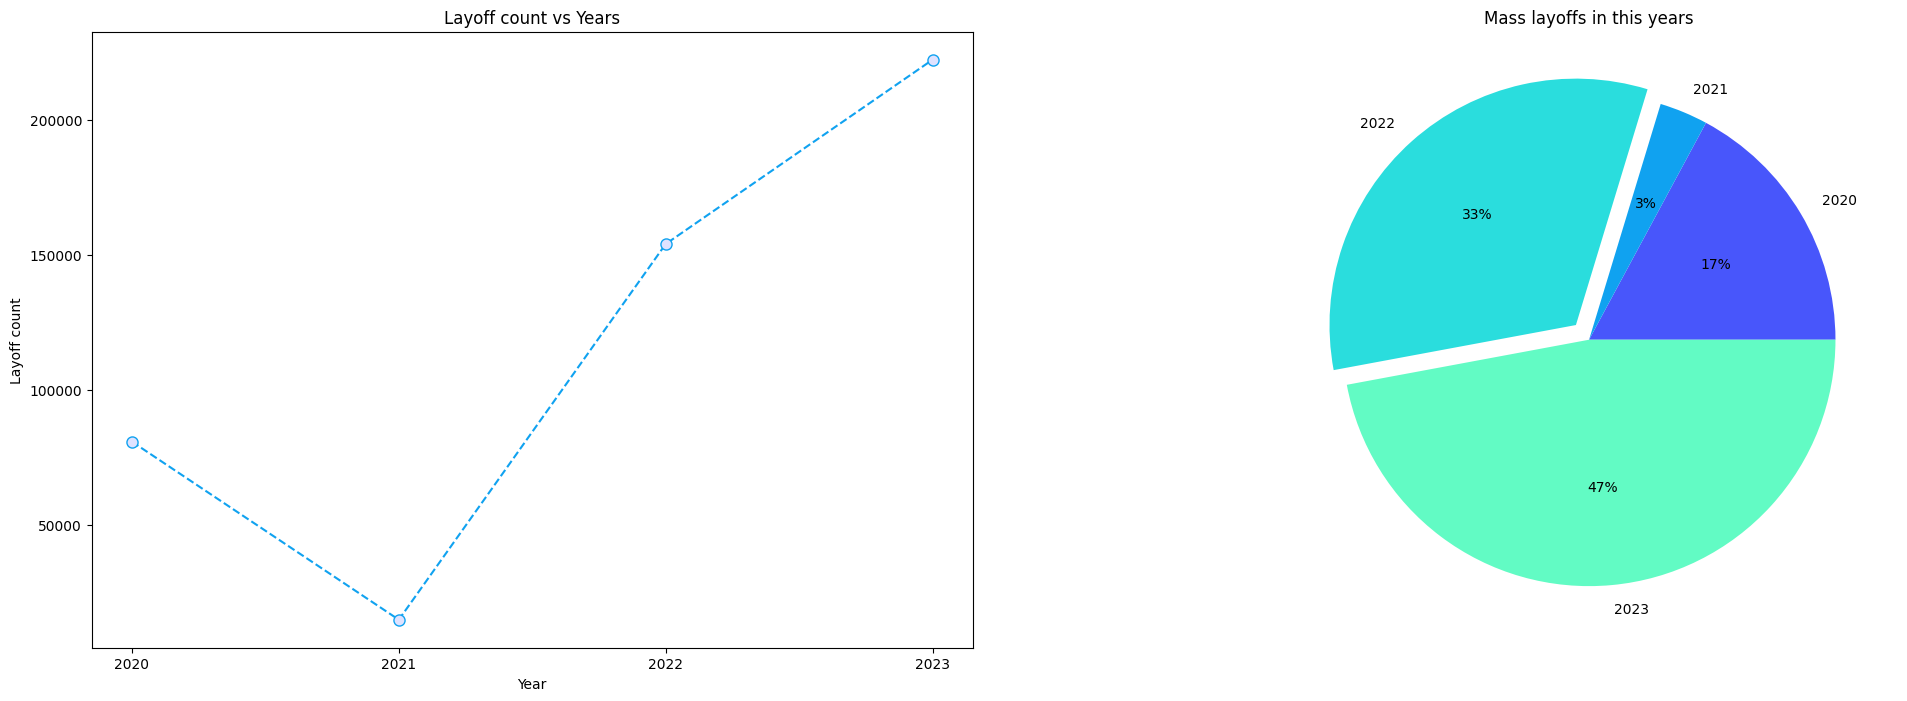

In [6]:

plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

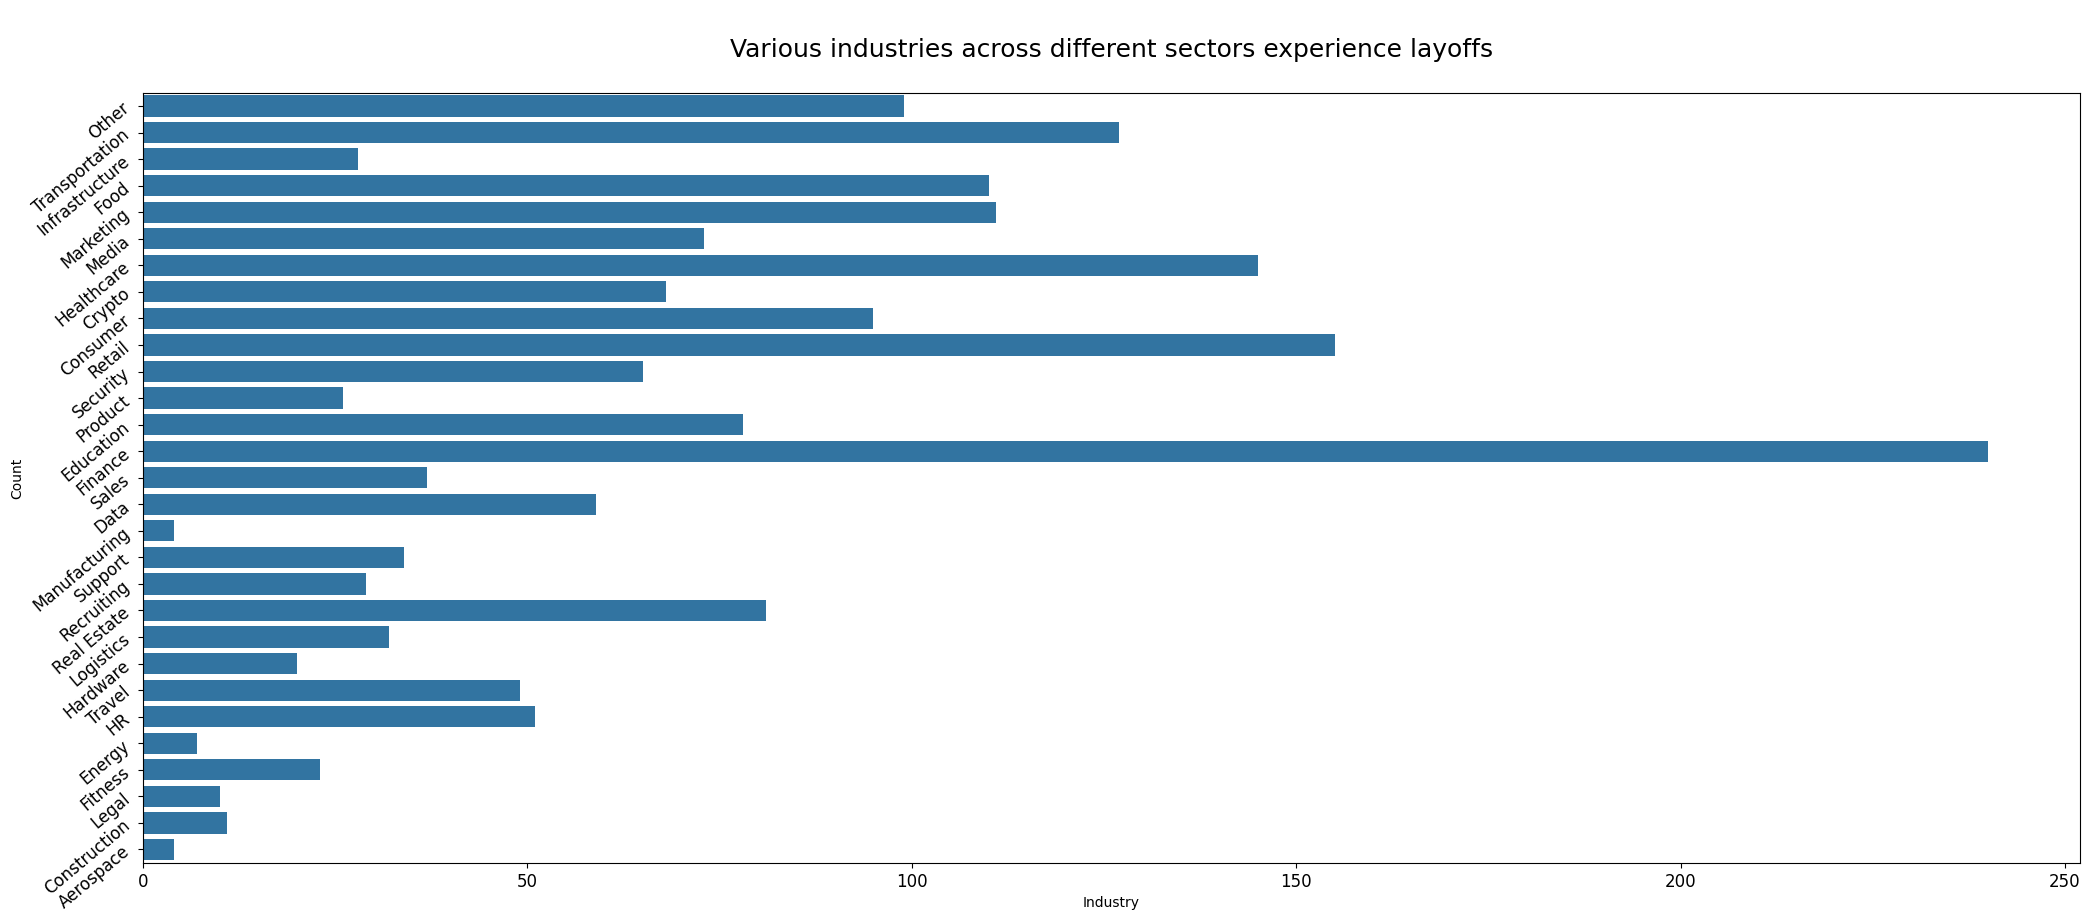

In [7]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=df)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nVarious industries across different sectors experience layoffs\n", fontsize=18)

plt.show()

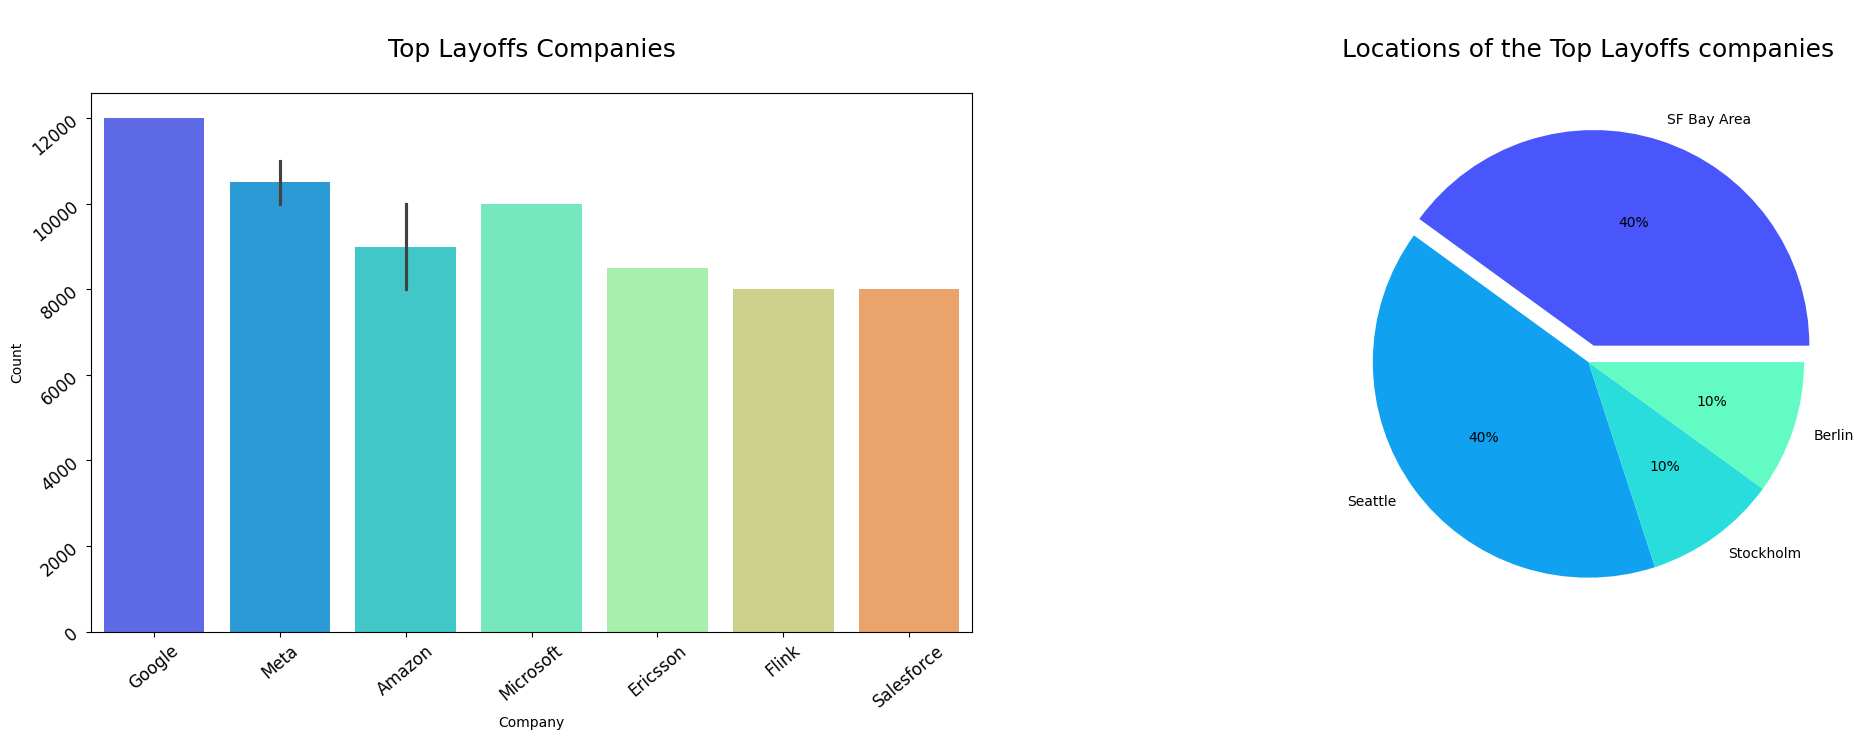

In [8]:
# grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
# grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
# grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]
#Top Layoffs companies in Group 4 (> 154 layoff count)
top_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
# top10_comp.groupby('Company')['Laid_Off_Count'].sum()
top_comp = top_comp.head(10)

plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top_comp, x=top_comp['Company'], y=top_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nTop Layoffs Companies\n", fontsize=18)

plt.subplot(1, 2, 2)
top_comp_loca = top_comp['Location_HQ'].value_counts()
plt.pie(data=top_comp, x=top_comp_loca.values, labels=top_comp_loca.index, autopct='%.f%%',  explode = [0.08, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top Layoffs companies\n", fontsize=18)

plt.show()

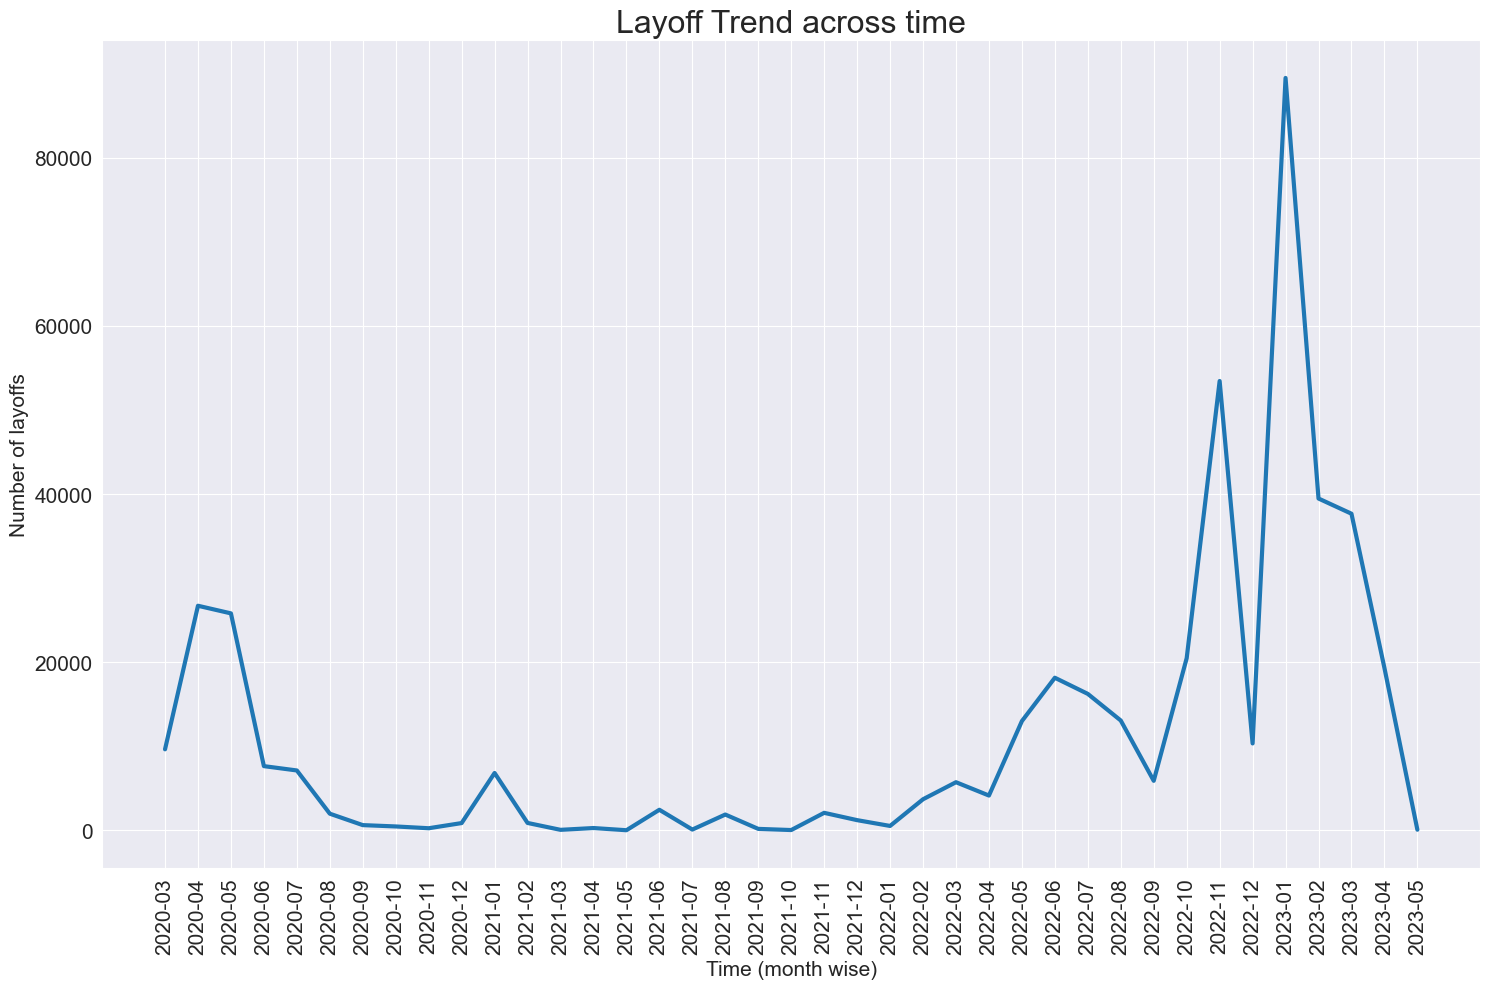

In [9]:
df = pd.read_csv('7.csv')

layoffs_df = df[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage', 'Date', 'Country']].copy()

layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])
layoffs_df['year'] = layoffs_df['Date'].dt.strftime('%Y')
layoffs_df['mon-year'] = layoffs_df['Date'].dt.strftime("%Y-%m")

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.lineplot(x='mon-year', y='Laid_Off_Count', data=layoffs_df.groupby('mon-year').sum(numeric_only=True).reset_index()[['mon-year','Laid_Off_Count']],linewidth=3)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Time (month wise)', fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title('Layoff Trend across time', fontsize=23)
plt.tight_layout()
plt.show()

# 2020 - 2024 Latest Data


In [53]:
# Loading the dataset
df = pd.read_csv('10copy.csv')
df.head() 

,Company,Location_HQ,Industry,total_laid_off,Percentaage,Date,Stage,Country,Funds_Raised
0,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18,Unknown,India,180.0
1,Stability AI,London,AI,20.0,NaN,2024-04-18,Unknown,United Kingdom,174.0
2,ConnectWise,Tampa Bay,Other,NaN,NaN,2024-04-17,Acquired,United States,1.0
3,Google,SF Bay Area,Consumer,NaN,NaN,2024-04-17,Post-IPO,United States,26.0
4,Rivian,Detroit,Transportation,NaN,0.01,2024-04-17,Post-IPO,United States,10700.0


In [47]:
# Can't impute Percentage values, losing 33.6% of the data when removed blank rows
df.dropna(inplace = True)
df.isna().mean()

Company           0.0
Location_HQ       0.0
Industry          0.0
total_laid_off    0.0
Percentaage       0.0
Date              0.0
Stage             0.0
Country           0.0
Funds_Raised      0.0
dtype: float64

In [50]:
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

df.rename(columns = {'total_laid_off': 'Layoffs'}, inplace = True)

Amount of duplicates: 2


In [51]:
clean_df = df.query('Percentaage < 0.6 and Funds_Raised < 1108.2 and Layoffs < 416.2')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 3566
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1167 non-null   object 
 1   Location_HQ   1167 non-null   object 
 2   Industry      1167 non-null   object 
 3   Layoffs       1167 non-null   float64
 4   Percentaage   1167 non-null   float64
 5   Date          1167 non-null   object 
 6   Stage         1167 non-null   object 
 7   Country       1167 non-null   object 
 8   Funds_Raised  1167 non-null   float64
dtypes: float64(3), object(6)
memory usage: 91.2+ KB


# Visualizations 2020-2024

In [58]:
import plotly.express as px

# Sort data by 'total_laid_off' and select top 50
top_layoffs_by_country = clean_df.sort_values(by='Layoffs', ascending=False).head(50)

# Create interactive bar chart
fig = px.bar(
    top_layoffs_by_country,
    x='Country',
    y='Layoffs',
    color='Layoffs',
    labels={'Country': 'Country', 'Layoffs': 'Total Laid Off'},
    title='Comparative Analysis of Layoffs by Country',
    color_continuous_scale=px.colors.sequential.Viridis,  # Change color scheme
    height=400,
    log_y=True  # Add logarithmic scale
)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [14]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Aggregate layoffs by industry
industry_layoffs = clean_df.groupby('Industry')['Layoffs'].sum().reset_index()

# Create a bar plot
fig_industries_bar = px.bar(
    industry_layoffs,
    x='Industry',
    y='Layoffs',
    title='Total Layoffs Across Industries',
    color='Industry'
)

fig_industries_bar.update_layout(title_x=0.5)

# Display the plot using ipywidgets
out = widgets.Output()
with out:
    display(fig_industries_bar.show())




In [45]:
# Grouping by industry and summing the layoffs
industry_layoffs = (clean_df
    .groupby('Industry')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .head(10)
)
# Print industries with corresponding layoffs
print("Industries with Most Layoffs (Top 10):")
for industry, count in industry_layoffs.items():
  print(f"{industry}: {count}")
# Bar chart for top industries with the most layoffs
fig_industries = px.bar(
    industry_layoffs,
    title = 'Industries with the Most Layoffs',
    color = industry_layoffs.index.isin(industry_layoffs.head(3).index),
    color_discrete_map = {False: 'blue', True: 'darkred'}
)

# Update layout to remove legend, set y-axis label, and center title
fig_industries.update_layout(
    showlegend = False,
    yaxis_title = 'Layoffs',
    title_x = 0.5
)

fig_industries.show()


Industries with Most Layoffs (Top 10):
Finance: 14438.0
Retail: 9477.0
Healthcare: 9202.0
Marketing: 6208.0
Other: 6056.0
Transportation: 6019.0
Food: 5858.0
Travel: 5282.0
Consumer: 5266.0
Security: 4522.0


# Layoffs over time

In [16]:
import pandas as pd
import plotly.express as px

clean_df['Date'] = pd.to_datetime(clean_df['Date'])

# Group by date and sum the layoffs
date_layoffs = (
    clean_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Filter data for the desired date range
filtered_date_layoffs = date_layoffs[date_layoffs['Date'].dt.year.between(2020, 2024)]

# Time series plot for layoffs over time
fig_date = px.line(
    filtered_date_layoffs,
    x='Date',
    y='Layoffs',
    title='Trend of Layoffs (2020-2024)',
    template='plotly_dark'
)

fig_date.update_layout(title_x=0.5)
fig_date.update_traces(line_color='orange')

fig_date.show()


In [17]:
# Calculate cumulative layoffs over time
df_sorted_date = clean_df.sort_values(by = 'Date')
df_sorted_date['Cumulative_Layoffs'] = df_sorted_date['Layoffs'].cumsum()

# Enhanced time series for cumulative layoffs over time
fig_cum_date = px.line(
    df_sorted_date,
    x = 'Date',
    y = 'Cumulative_Layoffs',
    title = 'Cumulative Layoffs Over Time',
    template = 'plotly_dark',
    labels = {'Cumulative_Layoffs': 'Cumulative Number of Layoffs'}
)

fig_cum_date.update_layout(title_x = 0.5)
fig_cum_date.update_traces(line = dict(color = 'red', width = 2.5))

fig_cum_date.show()

<h3>International Perspective: Countries Most Affected by Layoffs</h3>

As part of our comprehensive data analysis project focusing on global layoffs since the onset of the COVID-19 pandemic, a consistent and compelling trend has emerged: approximately four out of five of the top companies conducting significant layoffs each year are headquartered in the United States. This observation underscores the profound impact of the pandemic on the U.S. job market.

To broaden our understanding, we are extending our analysis beyond U.S. borders. Specifically, we will visualize the countries—excluding the United States—that have borne the brunt of layoffs during this challenging period. By examining this international dimension, we aim to provide a more holistic context, shedding light on the regions most significantly affected by workforce reductions.

In [18]:
import numpy as np

# Group by country and sum the layoffs
country_layoffs = (
    clean_df
    .groupby('Country')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Select top 15 countries by total layoffs
top_15_countries = country_layoffs.head(15)

# Bar chart for total layoffs by country
fig_country_layoffs = px.bar(
    top_15_countries, 
    x='Country', 
    y='Layoffs', 
    title='Total Layoffs by Country (Top 15)', 
    color=np.where(top_15_countries.index == 0, True, False),
    color_discrete_map={True: 'darkred', False: 'blue'}
)

fig_country_layoffs.update_layout(title_x=0.5, showlegend=False)

fig_country_layoffs.show()


In [19]:
# Group by country and sum the layoffs
country_layoffs = (
    clean_df
    .groupby('Country')['Layoffs']
    .sum()
    .reset_index()
)

# Map visualization for countries with layoffs
fig_country = px.choropleth(
    country_layoffs, 
    locations = 'Country',
    locationmode = 'country names',
    hover_name = 'Country',
    title = 'Layoffs by Country',
    color = 'Layoffs',
    color_continuous_scale = px.colors.sequential.Plasma
)

fig_country.update_layout(title_x = 0.5)

fig_country.show()

In [20]:
# Group by location and sum the layoffs
location_layoffs = (
    clean_df
    .groupby('Location_HQ')['Layoffs']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
    .head(10)
)

# Bar chart for top locations with the most layoffs
fig_location = px.bar(
    location_layoffs, 
    x = 'Location_HQ', 
    y = 'Layoffs', 
    title = 'Top Locations with the Highest Layoffs', 
    labels = {'Location_HQ': 'HQ Location'},
    color = np.where(location_layoffs.index == location_layoffs['Layoffs'].idxmax(), True, False),
    color_discrete_map = {True: 'darkred', False: 'blue'}
)

fig_location.update_layout(title_x = 0.5, showlegend = False)

fig_location.show()

In [21]:
df = pd.read_csv("16.csv")

In [22]:
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [23]:
df['year_of_laidOff'] = layoff_year_list

In [24]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)
df = df[df['Laid_Off_Count'].notna()]

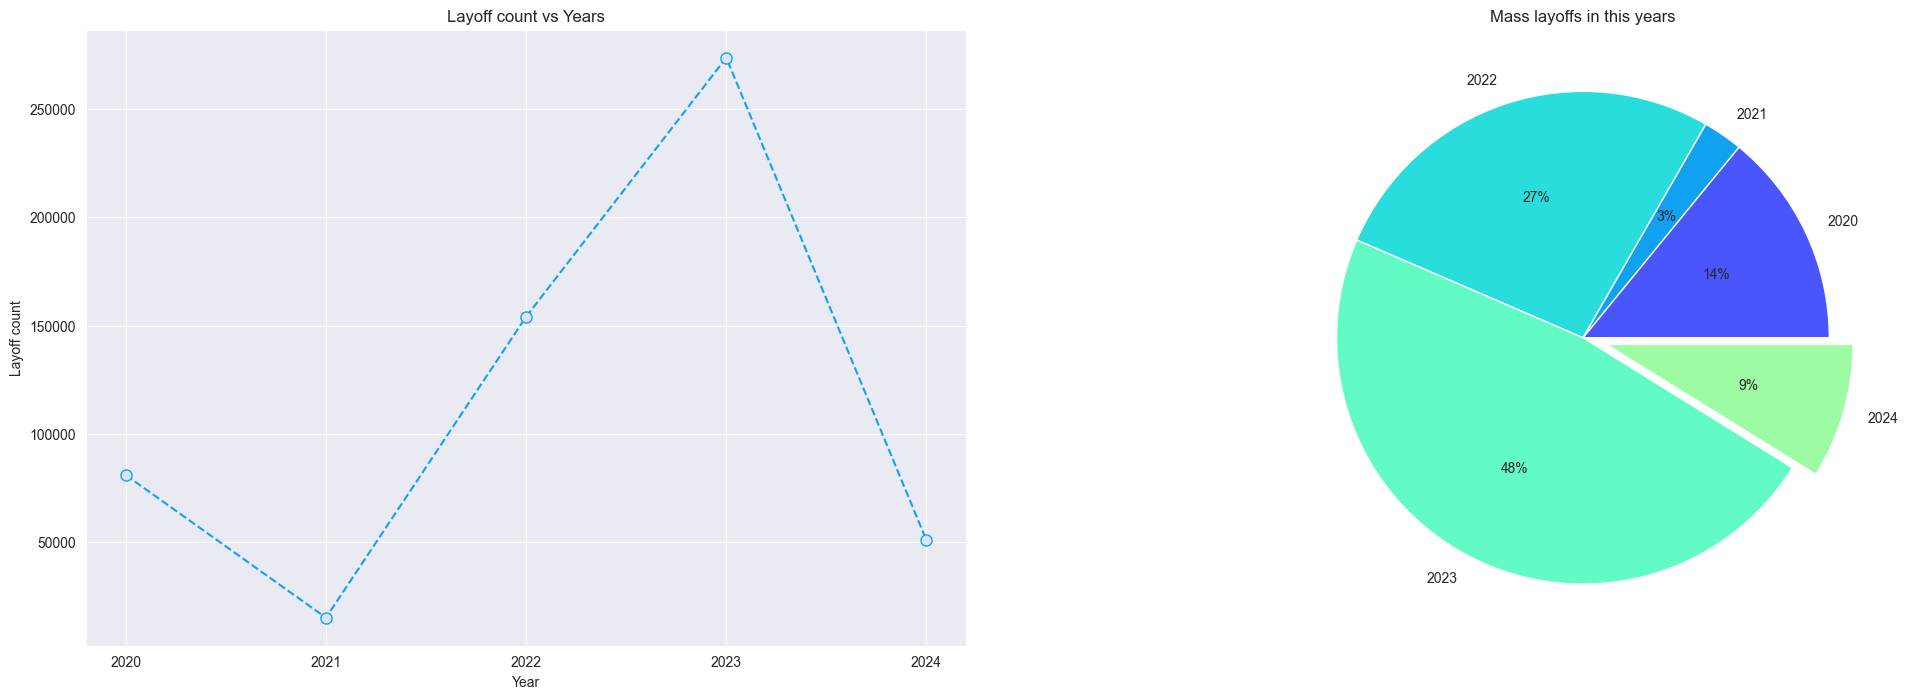

In [25]:

palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0,0,0.10], colors=palette)

plt.title("Mass layoffs in this years")

plt.show()

In [26]:
insight_1 = df.loc[df['Percentage'] == 1.00].dropna()
insight_1.head()
from geopy.geocoders import Nominatim

from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="layoff_data")

for i in range(len(insight_1['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i, timeout=10).latitude
    
    def find_long(i):
        return geolocator.geocode(i, timeout=10).longitude
    
insight_1['latitude'] = insight_1['Location_HQ'].apply(find_lat)
insight_1['longitude'] = insight_1['Location_HQ'].apply(find_long)

insight_1 = insight_1.fillna(0)

In [27]:
insight1_fig = px.scatter_mapbox(insight_1,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
insight1_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
insight1_fig.update_layout(title_text="Population of each cities")
insight1_fig.show()

# INDIA

# Layoff Analysis 2020-2023

Analyzing the impact of layoffs within the tech industry, specifically exploring the sectors hit hardest, geographical distribution of these layoffs, financial status of the companies involved, the relationship between financial status and layoff percentage, and future trends.

### Key Questions
1. Which industries within the tech sector are experiencing the most significant impact from layoffs?
2. In which geographic regions are companies with high layoff ratios predominantly located?
3. Has the wave of layoffs reached its peak, or is it still ongoing, what are the potential future trends of the layoff wave?

In [28]:
df = pd.read_csv('9.csv')
palette = sns.color_palette("rainbow",8)

### 1. Which industries within the tech sector are experiencing the most significant impact from layoffs?

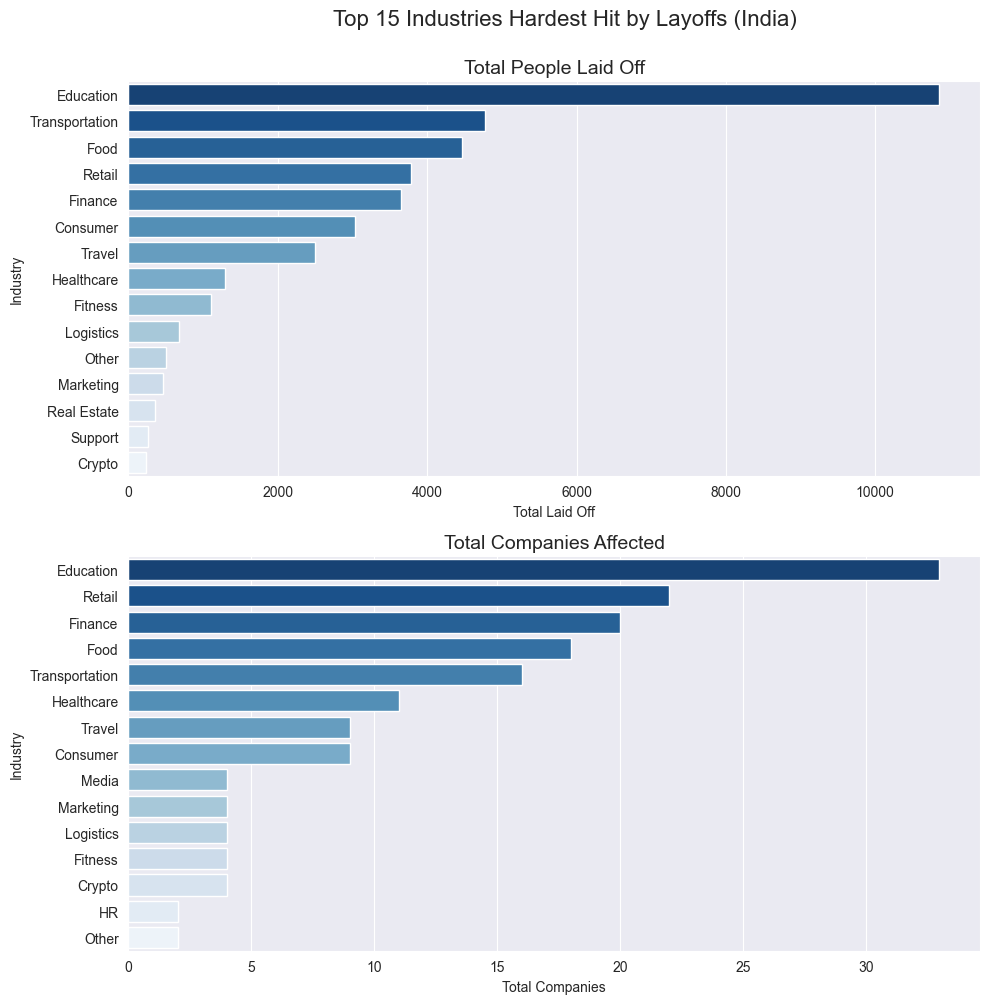

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you've already filtered the DataFrame for India
df = df[df.country == 'India']

# Visualize top industries

# Top 15 industries by total layoffs
indsSum = df[['industry', 'total_laid_off']] \
            .groupby('industry', as_index=False).sum() \
            .sort_values(by='total_laid_off', ascending=False)

# Top 15 industries by total layoff companies
indsCount = df[['industry', 'company']] \
            .groupby('industry', as_index=False).count() \
            .sort_values(by='company', ascending=False)

# Industries in both top ranks
inds = [i for i in indsSum.industry[:15] if i in indsCount.industry[:15].tolist()]

# Create a figure and set the size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig.suptitle('Top 15 Industries Hardest Hit by Layoffs (India)', fontsize=16, x=0.57, y=1)

# First subplot (top)
sns.barplot(ax=axes[0], data=indsSum.iloc[:15], x='total_laid_off', y='industry', palette='Blues_r')
axes[0].set_title('Total People Laid Off', fontsize=14)
axes[0].set_xlabel('Total Laid Off')
axes[0].set_ylabel('Industry')

# Second subplot (bottom)
sns.barplot(ax=axes[1], data=indsCount.iloc[:15], x='company', y='industry', palette='Blues_r')
axes[1].set_title('Total Companies Affected', fontsize=14)
axes[1].set_xlabel('Total Companies')
axes[1].set_ylabel('Industry')

# Adjust the layout and display the combined plots
plt.tight_layout()
plt.show()


In [30]:
inds

['Education',
 'Transportation',
 'Food',
 'Retail',
 'Finance',
 'Consumer',
 'Travel',
 'Healthcare',
 'Fitness',
 'Logistics',
 'Other',
 'Marketing',
 'Crypto']

In [31]:
df["percentage_laid_off"].describe()

count    101.000000
mean       0.313762
std        0.289637
min        0.020000
25%        0.100000
50%        0.220000
75%        0.400000
max        1.000000
Name: percentage_laid_off, dtype: float64

### 2. In which geographic regions are companies with high layoff ratios predominantly located?


In [32]:
top_layoff_companies = df[df.percentage_laid_off > 0.29]
df.location.value_counts()[:20]

location
Bengaluru    95
Mumbai       26
Gurugram     22
New Delhi    15
Noida         3
Chennai       3
Pune          1
Indore        1
Patna         1
Hyderabad     1
Ahmedabad     1
Name: count, dtype: int64

### 3. Has the wave of layoffs reached its peak, or is it still ongoing, and what are the potential future trends of the layoff wave?

In [33]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate layoff data by date
df_daily = df.groupby('date').sum()['total_laid_off'].reset_index()

# check the date range
min(df.date), max(df.date)

(Timestamp('2020-03-19 00:00:00'), Timestamp('2023-04-27 00:00:00'))

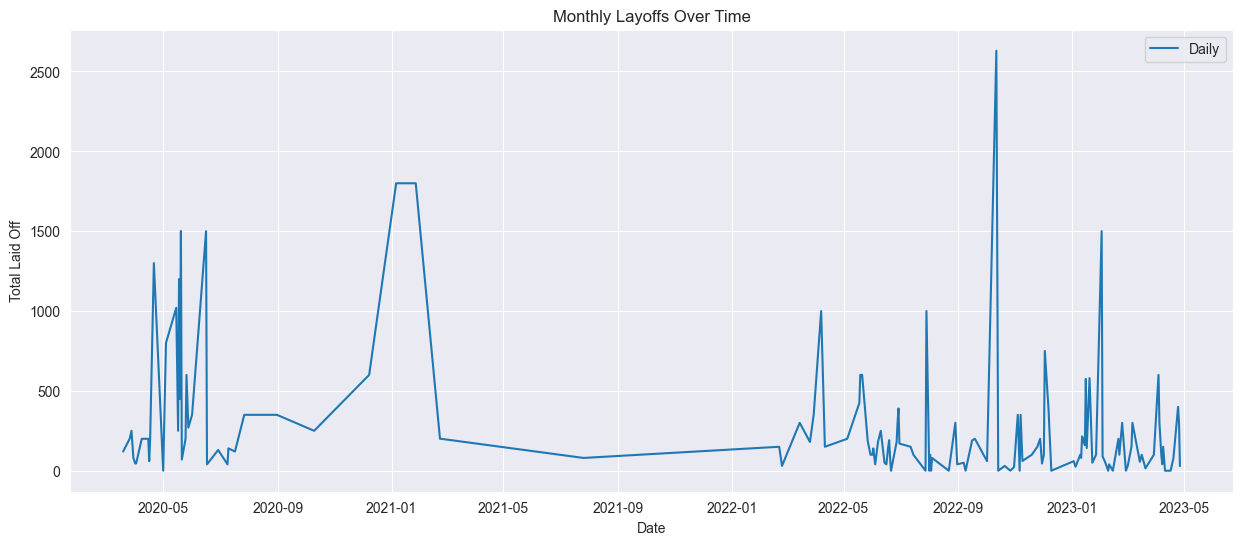

In [34]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_daily, x='date', y='total_laid_off', label='Daily')
plt.title('Monthly Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend()
plt.show()

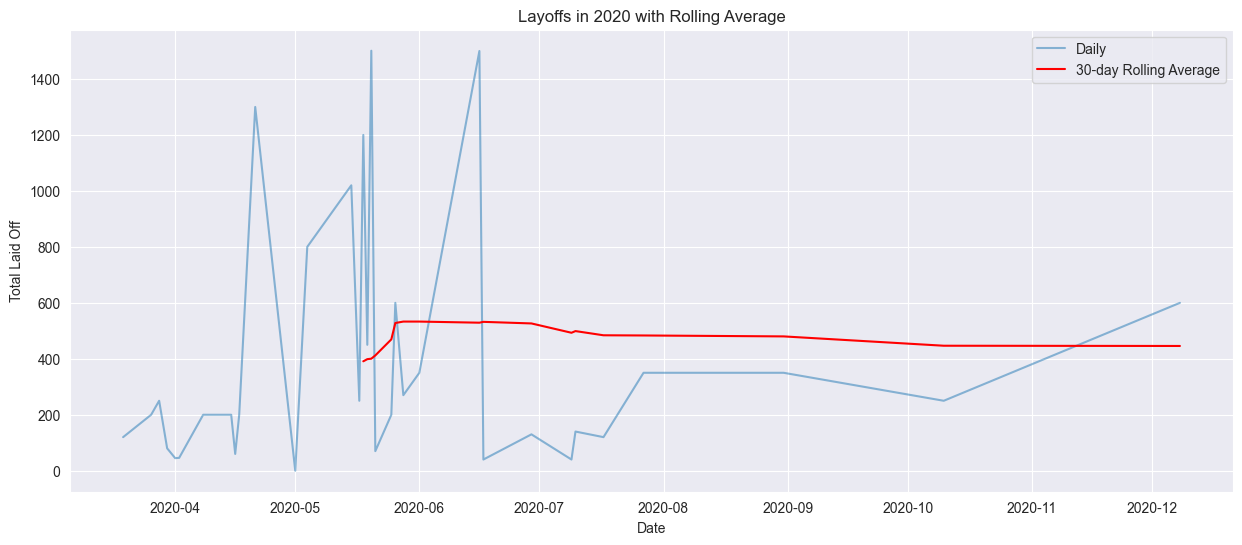

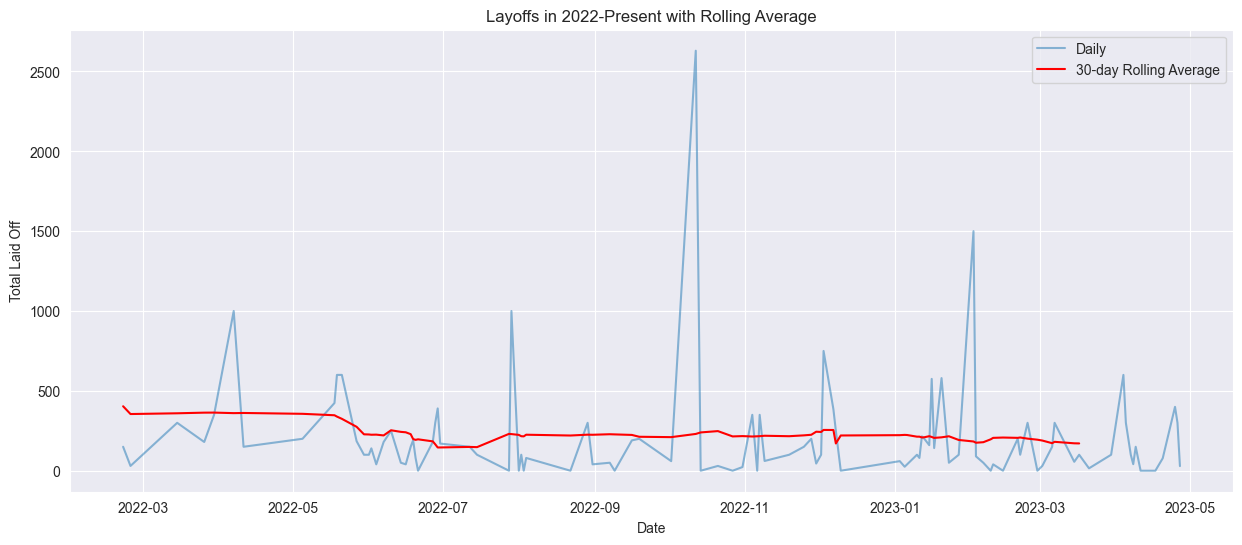

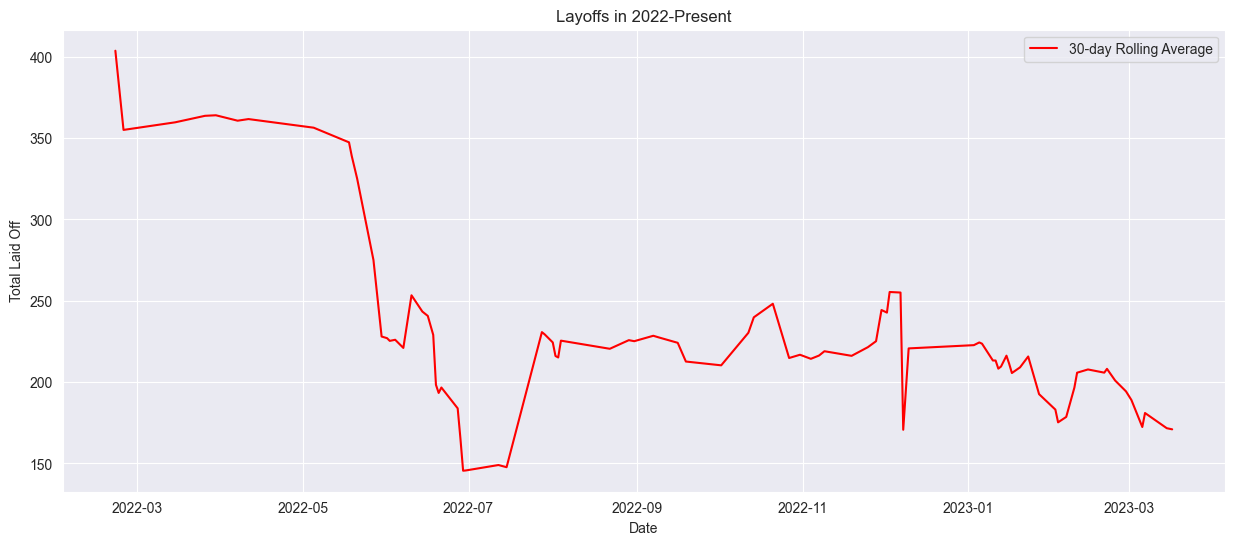

In [35]:
# Calculate the 30-day rolling average
df_daily['rolling_avg'] = df_daily['total_laid_off'].rolling(window=30, center=True).mean()

# Filter data by year
df_2020 = df_daily[(df_daily['date'].dt.year == 2020)]
df_2022_present = df_daily[(df_daily['date'].dt.year >= 2022)]

def plot_layoffs_by_year(df, title):
    """
    Plots a line chart of layoffs over time based on the given dataframe 'df'.
    
    Args:
    df (pd.DataFrame): Dataframe with 'date', 'total_laid_off', and 'rolling_avg' columns.
    title (str): Title for the plot.

    Returns:
    None. Displays the plot.
    """
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df, x='date', y='total_laid_off', alpha=0.5, label='Daily')
    sns.lineplot(data=df, x='date', y='rolling_avg', color='red', label='30-day Rolling Average')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Total Laid Off')
    plt.legend()
    plt.show()


# Plot the data for 2020
plot_layoffs_by_year(df_2020, 'Layoffs in 2020 with Rolling Average')

# Plot the data for 2022-present
plot_layoffs_by_year(df_2022_present, 'Layoffs in 2022-Present with Rolling Average')

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2022_present, x='date', y='rolling_avg', color='red', label='30-day Rolling Average')
plt.title('Layoffs in 2022-Present')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend()
plt.show()

## Report on India Layoffs 2020-2024


In [36]:
# Loading the dataset
df = pd.read_csv('10copy.csv')
df.head() 

# Since I can't impute Percentage values, which could bias the amount of employees laid off, I'm losing 33.6% of the data when I remove blank rows
df.dropna(inplace = True)
df.isna().mean()

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

df.rename(columns = {'total_laid_off': 'Layoffs'}, inplace = True)

clean_df = df.query('Percentaage < 0.6 and Funds_Raised < 1108.2 and Layoffs < 416.2')
clean_df.info()




Amount of duplicates: 2
<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 3566
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1167 non-null   object 
 1   Location_HQ   1167 non-null   object 
 2   Industry      1167 non-null   object 
 3   Layoffs       1167 non-null   float64
 4   Percentaage   1167 non-null   float64
 5   Date          1167 non-null   object 
 6   Stage         1167 non-null   object 
 7   Country       1167 non-null   object 
 8   Funds_Raised  1167 non-null   float64
dtypes: float64(3), object(6)
memory usage: 91.2+ KB


In [37]:
# Obtaining only US-related data
ind_clean_df = clean_df[clean_df['Country'] == 'India']

# Comparing with uncleaned data
ind_df = df[df['Country'] == 'India']

ind_clean_df.head()

,Company,Location_HQ,Industry,Layoffs,Percentaage,Date,Stage,Country,Funds_Raised
0,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18,Unknown,India,180.0
21,Bolt.Earth,Bengaluru,Energy,70.0,0.40,2024-04-06,Series B,India,24.0
73,Pristyn Care,Gurugram,Healthcare,120.0,0.07,2024-03-01,Series E,India,177.0
110,Wint Wealth,Nashik,Finance,19.0,0.20,2024-02-14,Series A,India,16.0
121,Licious,Bengaluru,Food,80.0,0.03,2024-02-09,Series F,India,490.0


## India Data Overview

In [38]:
# Calculate aggregated statistics
num_companies = [ind_clean_df['Company'].nunique(), ind_df['Company'].nunique()]
total_layoffs = [ind_clean_df['Layoffs'].sum(), ind_df['Layoffs'].sum()]
avg_funds_raised = [ind_clean_df['Funds_Raised'].mean(), ind_df['Funds_Raised'].mean()]
total_funds_raised = [ind_clean_df['Funds_Raised'].sum(), ind_df['Funds_Raised'].sum()]

ind_data = {
    'Number of Companies': num_companies,
    'Total Layoffs': total_layoffs,
    'Avg Funds Raised in Millions ($)': avg_funds_raised,
    'Total Funds Raised in Millions ($)': total_funds_raised,
}

ind = pd.DataFrame(ind_data, index = ['Cleaned Data', 'Raw Data'])

# Formatting DataFrame
ind = ind.astype(int)
ind

,Number of Companies,Total Layoffs,Avg Funds Raised in Millions ($),Total Funds Raised in Millions ($)
Cleaned Data,67,9683,197,14819
Raw Data,85,27107,1063,113772


In [39]:
# Top industry layoffs in IND

top_industries_clean = (
    ind_clean_df
    .groupby('Industry')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_industries_raw = (
    ind_df
    .groupby('Industry')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Add 'Label' column to identify cleaned and raw data
top_industries_clean['Label'] = 'Cleaned Data'
top_industries_raw['Label'] = 'Raw Data'

# Combine the DataFrames
top_industries = (
    pd.concat([top_industries_clean, top_industries_raw])
    .sort_values(by='Layoffs', ascending=False)
)

# Create bar plot
fig_industries_compare = px.bar(
    top_industries,
    x='Industry',
    y='Layoffs',
    color='Label',
    title='Industries in IND with the Highest Workforce Reductions',
    barmode='overlay',
    color_discrete_map={'Raw Data': 'darkorange', 'Cleaned Data': 'blue'}
)

fig_industries_compare.update_layout(title_x=0.5, legend={'title': ''})

fig_industries_compare.show()


In [40]:
# Top Companies with highest layoffs (Cleaned Data)
top_companies_clean = (
    ind_clean_df
    .groupby('Company')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Top Companies with highest layoffs (Raw Data)
top_companies_raw = (
    ind_df
    .groupby('Company')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Bar chart for Top 10 IND Company Layoffs (Cleaned Data)
bar_company_clean = px.bar(
    top_companies_clean,
    x='Company',
    y='Layoffs',
    title='Top 10 INDIA Company Layoffs (Cleaned Data)',
    color=np.where(top_companies_clean.index == top_companies_clean['Layoffs'].idxmax(), True, False),
    color_discrete_map={True: 'darkorange', False: 'darkblue'}
)

# Bar chart for Top 10 IND Company Layoffs (Raw Data)
bar_company_raw = px.bar(
    top_companies_raw,
    x='Company',
    y='Layoffs',
    title='Top 10 IND Company Layoffs',
    color=np.where(top_companies_raw.index == top_companies_raw['Layoffs'].idxmax(), True, False),
    color_discrete_map={True: 'red', False: 'blue'}
)

# Update layout for both charts
for chart in [bar_company_clean, bar_company_raw]:
    chart.update_layout(title_x=0.5, showlegend=False)

# Show the charts
bar_company_clean.show()
bar_company_raw.show()


In [41]:
# Group by IND location and sum the layoffs (Cleaned Data)
location_layoffs_ind_clean = (
    ind_clean_df
    .groupby('Location_HQ')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Group by IND location and sum the layoffs (Raw Data)
location_layoffs_ind_raw = (
    ind_df
    .groupby('Location_HQ')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Combine both datasets
combined_data = pd.concat(
    [location_layoffs_ind_raw.assign(Data='Raw Data'),
     location_layoffs_ind_clean.assign(Data='Cleaned Data')]
)

# Bar chart for IND locations with the most layoffs
fig_combined_location_layoffs = px.bar(
    combined_data,
    x='Location_HQ',
    y='Layoffs',
    title='Highest IND Layoffs by Location',
    labels={'Location_HQ': 'HQ Location'},
    barmode='overlay',
    color='Data',
    color_discrete_map={'Cleaned Data': 'blue', 'Raw Data': 'darkorange'}
)

# Update layout for the combined chart
fig_combined_location_layoffs.update_layout(title={'x': 0.5}, legend={'title': ''})

# Show the combined chart
fig_combined_location_layoffs.show()


In [42]:
# Trend of layoffs in IND (cleaned data)
layoffs_trend_clean = (
    ind_clean_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Trend of layoffs in IND (raw data)
layoffs_trend_raw = (
    ind_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Add 'Label' column to identify cleaned and raw data
layoffs_trend_clean['Label'] = 'Cleaned Data'
layoffs_trend_raw['Label'] = 'Raw Data'

# Combine the DataFrames
trend_data = pd.concat([layoffs_trend_clean, layoffs_trend_raw])

# Plotting the trends
fig_trend_compare = px.line(
    trend_data,
    x='Date',
    y='Layoffs',
    color='Label',
    title='Layoffs Over Time in India',
    template='plotly_dark'
)

# Updating formatting
fig_trend_compare.update_layout(title={'x': 0.5}, legend={'title': ''})

fig_trend_compare.show()


In [43]:
import pandas as pd
import plotly.express as px

# Ignore Pandas warnings
pd.set_option('mode.chained_assignment', None)

# Add 'Month' column with period format
ind_clean_df.loc[:, 'Month'] = pd.to_datetime(ind_clean_df['Date']).dt.to_period('M')
ind_df.loc[:, 'Month'] = pd.to_datetime(ind_df['Date']).dt.to_period('M')

# Calculate top layoffs for cleaned and raw data
month_layoffs_clean = (
    ind_clean_df
    .groupby('Month')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

month_layoffs_raw = (
    ind_df
    .groupby('Month')['Layoffs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Add 'Label' column to identify cleaned and raw data
month_layoffs_clean.loc[:, 'Label'] = 'Cleaned Data'
month_layoffs_raw.loc[:, 'Label'] = 'Raw Data'

# Concatenate and set index
month_df = pd.concat([month_layoffs_clean, month_layoffs_raw]).sort_values(by='Layoffs')

# Formatting 'Layoffs' column
month_df['Layoffs'] = month_df['Layoffs'].apply('{:,.0f}'.format)

# Convert 'Month' to string
month_df['Month'] = month_df['Month'].astype(str)

# Plotting bar graph of top layoffs by month
fig_month = px.bar(
    month_df,
    x='Month',
    y='Layoffs',
    title='Months with the Highest Layoffs in India',
    color='Label',
    barmode='overlay'
)

# Update layout
fig_month.update_layout(title_x=0.5)

# Show the plot
fig_month.show()

# Hide index in the displayed DataFrame
# month_df.style.hide_index()


# Overview of India layoffs 2023

In [44]:
import pandas as pd

# Filtering the dataset for 2023 data
ind_2023_clean_df = ind_clean_df[ind_clean_df['Date'].astype(str).str.contains('2023')]
ind_2023_raw_df = ind_df[ind_df['Date'].str.contains('2023')]

# Function to calculate average and total values for a given column
def calculate_metrics(df, column_name):
    metrics = (
        df.groupby('Industry')[column_name]
        .agg(['mean', 'sum'])
        .rename(columns={'mean': f'Average {column_name}', 'sum': f'Total {column_name}'})
    )
    return metrics

# Average and total layoffs by industry in 2023 for cleaned and raw data
industry_2023_layoffs_clean = calculate_metrics(ind_2023_clean_df, 'Layoffs')
industry_2023_layoffs_raw = calculate_metrics(ind_2023_raw_df, 'Layoffs')

# Average and total funds raised by industry in 2023 for cleaned and raw data
industry_2023_funds_clean = calculate_metrics(ind_2023_clean_df, 'Funds_Raised')
industry_2023_funds_raw = calculate_metrics(ind_2023_raw_df, 'Funds_Raised')

# Merging the two dataframes for layoffs
industry_2023_clean = (
    industry_2023_layoffs_clean
    .join(industry_2023_funds_clean)
    .sort_values(by='Total Layoffs', ascending=False)
    .head(10)
)

industry_2023_raw = (
    industry_2023_layoffs_raw
    .join(industry_2023_funds_raw)
    .sort_values(by='Total Layoffs', ascending=False)
    .head(10)
)

# Concatenating the cleaned and raw dataframes with a multi-index
final_2023_ind_df = pd.concat([industry_2023_clean, industry_2023_raw], keys=['Cleaned Data', 'Raw Data']).astype(int)

# Display the final DataFrame
final_2023_ind_df.rename(
    columns={
        'Average Layoffs': 'Avg Layoffs',
        'Average Funds_Raised': 'Avg Funds Raised in Millions ($)',
        'Total Funds_Raised': 'Total Funds Raised in Millions ($)'
    }
)


Avg Layoffs  Total Layoffs  \
             Industry                                     
Cleaned Data Food                    197            790   
             Healthcare              150            600   
             Retail                   98            592   
             Other                   250            500   
             Finance                  80            484   
             Transportation          170            340   
             Support                 142            142   
             Education               120            120   
             Consumer                 59            118   
             Crypto                  100            100   
Raw Data     Food                    261           1570   
             Consumer                183            918   
             Healthcare              154            770   
             Retail                   98            692   
             Finance                  90            634   
             Other                   250            500   
             Transportation          170            340   
             Support                 142            142   
             Education               120            120   
             Crypto                  100            100   

                             Avg Funds Raised in Millions ($)  \
             Industry                                           
Cleaned Data Food                                         306   
             Healthcare                                    99   
             Retail                                       335   
             Other                                        257   
             Finance                                       69   
             Transportation                               363   
             Support                                       87   
             Education                                    100   
             Consumer                                      51   
             Crypto                                       451   
Raw Data     Food                                         810   
             Consumer                                     710   
             Healthcare                                    84   
             Retail                                       501   
             Finance                                       76   
             Other                                        257   
             Transportation                               363   
             Support                                       87   
             Education                                    100   
             Crypto                                       451   

                             Total Funds Raised in Millions ($)  
             Industry                                            
Cleaned Data Food                                          1224  
             Healthcare                                     397  
             Retail                                        2010  
             Other                                          514  
             Finance                                        416  
             Transportation                                 727  
             Support                                         87  
             Education                                      100  
             Consumer                                       102  
             Crypto                                         451  
Raw Data     Food                                          4863  
             Consumer                                      3552  
             Healthcare                                     421  
             Retail                                        3510  
             Finance                                        536  
             Other                                          514  
             Transportation                                 727  
             Support                         